In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
SSRIdataTree = [
    # first tree
    { 'name': 'Pharmacology', 'children': [
        { 'name': 'Pharmacokinetics', 'children': [
            { 'name': 'Analytical Methods' },
            { 'name': 'Cytochromes' },
            { 'name': 'Blood-Brain Barrier' }
        ]},
        { 'name': 'Pharmacodynamics', 'children': [
            { 'name': 'Metabolism' },
            { 'name': 'Mechanism of Action' }
        ]},
        { 'name': 'Pharmacogenetics' }
    ]},

    # second tree
    { 'name': 'Indications', 'children': [
        { 'name': 'Disorder/Disease', 'children': [
            { 'name': 'Depression' },
            { 'name': 'Anxiety' },
            { 'name': 'Other' }
        ]},
        { 'name': 'Special Populations', 'children': [
            { 'name': 'Pregnancy' },
            { 'name': 'Pediatrics' },
            { 'name': 'Other' }
        ]},
        { 'name': 'Pharmacoepidemiology' }
    ]},

    # third tree
    { 'name': 'Safety', 'children': [
        { 'name': 'Adverse Effects' },
        { 'name': 'Drug Interactions' },
        { 'name': 'Overdose' },
        { 'name': 'Other' }
    ]},

    # fourth tree
    { 'name': 'Other', 'children': [
        { 'name': 'Environment' },
        { 'name': 'Economics' },
        { 'name': 'Misc' }
    ]}
]


In [3]:
SSRIdataTree = [
    # first tree
    {
        'Pharmacology': {
            'Pharmacokinetics': [
                'Analytical Methods',
                'Other',
            ],
            'Pharmacodynamics': [
                'Mechanism of Action'
            ],
            'Pharmacogenetics': []
        }
    },
    # second tree
    {
        'Indications': {
            'Disorder/Disease': [
                'Depression',
                'Anxiety',
                'Other'
            ],
            'Special Populations': [
                'Pregnancy',
                'Pediatrics',
                'Other'
            ],
            'Pharmacoepidemiology': []
        }
    },
    # third tree
    {
        'Safety': [
            'Adverse Effects',
            'Drug Interactions',
            'Overdose',
            'Other'
        ]
    },
    # fourth tree
    {
        'Other': [
            'Environment',
            'Economics',
            'Misc'
        ]
    }
]


In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the SSRI data tree
SSRIdataTree = [
    # first tree
    {
        'Pharmacology': {
            'Pharmacokinetics': [
                'Analytical Methods',
                'Other',
            ],
            'Pharmacodynamics': [
                'Mechanism of Action'
            ],
            'Pharmacogenetics': []
        }
    },
    # second tree
    {
        'Indications': {
            'Disorder/Disease': [
                'Depression',
                'Anxiety',
                'Other'
            ],
            'Special Populations': [
                'Pregnancy',
                'Pediatrics',
                'Other2'
            ],
            'Pharmacoepidemiology': []
        }
    },
    # third tree
    {
        'Safety': [
            'Adverse Effects',
            'Drug Interactions',
            'Overdose',
            'Other'
        ]
    },
    # fourth tree
    {
        'Other': [
            'Environment',
            'Economics',
            'Misc'
        ]
    }
]



/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_42733/2662186133.py:42: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_42733/2662186133.py:42: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_42733/2662186133.py:42: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layou

1
2
3


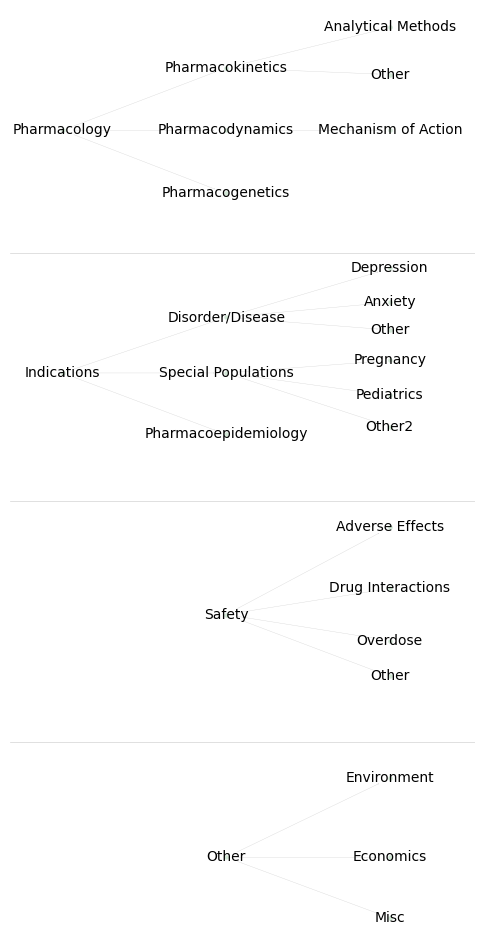

In [6]:
# Modified function to add nodes and edges recursively (with explicit G argument)
def add_nodes_and_edges(G, parent, children):  # Added G as an argument
    if isinstance(children, dict):
        for child_key, child_value in children.items():
            G.add_node(child_key)
            G.add_edge(parent, child_key)
            add_nodes_and_edges(G, child_key, child_value)  # Pass G recursively
    elif isinstance(children, list):
        for child in children:
            G.add_node(child)
            G.add_edge(parent, child)

def new_positions_calculator(all_positions):
    x_positions = [v[0] for pos in all_positions for k, v in pos.items()]
    x_positions = sorted(list(set(x_positions)))
    new_positions = []
    for pos in all_positions:
        new_pos = {}
        for label, (x, y) in pos.items():
            if x == x_positions[0]:
                x_new = x_positions[2]
            elif x == x_positions[2]:
                x_new = x_positions[0]
            else:
                x_new = x
            new_pos[label] = (x_new, y)
        new_positions.append(new_pos)
    return new_positions


# Calculate positions only once (outside the loop)
all_positions = []
graphs = []

for i, tree in enumerate(SSRIdataTree):
    G = nx.DiGraph()
    root_name = list(tree.keys())[0]
    G.add_node(root_name)
    add_nodes_and_edges(G, root_name, tree[root_name])
    graphs.append(G)

    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
    transposed_pos = {node: (y * 2, -x) for node, (x, y) in pos.items()} 
    all_positions.append(transposed_pos)


new_positions = new_positions_calculator(all_positions)


# Plot the graphs side by side with shared x-axis
fig, axs = plt.subplots(len(SSRIdataTree), 1, figsize=(6, 12), sharex=True) # Share x-axis

max_x = max([v[0] for pos in new_positions for k, v in pos.items()])
# Iterate over graphs and their corresponding positions
for i, (G, pos) in enumerate(zip(graphs, new_positions)):
    # Draw edges in light grey
    nx.draw_networkx_edges(G, pos, ax=axs[i], edge_color='lightgrey', width=.25, arrowsize=1)  

    # Draw nodes in skyblue with labels
    nx.draw_networkx_nodes(G, pos, ax=axs[i], node_size=5, node_color="#d2e7d6")  
    nx.draw_networkx_labels(G, pos, ax=axs[i], font_size=10)

    axs[i].set_axis_off()
    # if i is 0 or uneven, plot a thin grey line to separate the graphs
    if i != 0 and i != len(SSRIdataTree):
        print(i)
        axs[i].axhline(0, color='lightgrey', lw=.5)
    # Adjust the x-axis limits for more horizontal spacing (apply to all subplots)
    for ax in axs:
        xlim = ax.get_xlim()
        ax.set_xlim(xlim[0] - 1, max_x + 75)  # Add padding on the right side only

plt.show()


# citospace
